In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [2]:
df=pd.read_excel('clean_data.xlsx')
df.head()

,SL. No,Ward,Employees,No of shifts,GFA(sq.ft),No of floors,Maximum number,Number of vehicles owned Bikes,Number of vehicles owned 3- Wheelers,Number of vehicles owned Cars,...,Number of vehciles Departing 2 axle trucks Per day,Number of vehciles Departing 2 axle trucks Per week,Number of vehciles Departing 2 axle trucks Per month,Number of vehciles Departing 3 or 4 axle trucks Per day,Number of vehciles Departing 3 or 4 axle trucks Per week,Number of vehciles Departing 3 or 4 axle trucks Per month,Number of vehciles Departing Other Per day,Number of vehciles Departing Other Per week,Number of vehciles Departing Other Per month,Total departing
0,1.0,A,100.0,NaN,10758.0,2.0,300.0,0,0,2,...,0,0,0,0,0,0,0,0,0,1.0
1,2.0,A,100.0,NaN,6000.0,1.0,100.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,3.0,A,50.0,1.0,4841.0,2.0,60.0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
3,4.0,A,48.0,1.0,5379.0,2.0,80.0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
4,5.0,A,60.0,2.0,3000.0,1.0,60.0,0,0,5,...,0,0,0,0,0,0,0,0,0,2.0


In [3]:
df.fillna(0, inplace=True)

In [4]:
y=df['Total arriving'].values
y

array([3.19047619e-01, 6.60476190e+00, 4.71428571e+00, 1.02857143e+01,
       1.52857143e+01, 1.01428571e+01, 3.28571429e+00, 6.28571429e+00,
       6.00000000e+00, 6.66666667e-02, 6.66666667e-02, 3.14285714e+00,
       2.28571429e+00, 1.42857143e-01, 1.42857143e-01, 1.42857143e-01,
       4.28571429e+00, 1.14285714e+00, 3.00000000e+00, 2.71428571e+00,
       4.00000000e+00, 6.66666667e-02, 6.66666667e-02, 1.42857143e-01,
       1.00000000e+00, 1.14285714e+00, 2.52857143e+01, 2.42857143e+00,
       1.42857143e-01, 2.28571429e+00, 6.28571429e+00, 4.28571429e+00,
       6.66666667e-02, 3.33333333e-02, 1.14285714e+00, 1.42857143e+00,
       1.28571429e+00, 5.71428571e-01, 2.28571429e+00, 1.00000000e+00,
       5.20000000e+00, 3.00000000e+00, 7.10000000e+00, 2.85714286e-01,
       7.14285714e-01, 1.00000000e+00, 2.00000000e+01, 1.42857143e-01,
       2.14285714e+00, 1.74590476e+02])

In [23]:
df.columns[2:15]

Index(['Employees', 'No of shifts', 'GFA(sq.ft)', 'No of floors',
       'Maximum number', 'Number of vehicles owned Bikes',
       'Number of vehicles owned 3- Wheelers', 'Number of vehicles owned Cars',
       'Number of vehicles owned Vans', 'Number of vehicles owned 2 axle',
       'Number of vehicles owned 3_4 axle', 'Number of vehicles owned Others',
       'Number of vehicles owned Total'],
      dtype='object')

In [49]:
df['employees x shifts'] = df['Employees']*df['No of shifts']

In [50]:
cols=list(df.columns.values)

In [52]:
df2=df[['SL. No',
 'Ward',
 'Employees',
    'employees x shifts',
 'No of shifts',
 'GFA(sq.ft)',
 'No of floors',
 'Maximum number',
 'Number of vehicles owned Bikes',
 'Number of vehicles owned 3- Wheelers',
 'Number of vehicles owned Cars',
 'Number of vehicles owned Vans',
 'Number of vehicles owned 2 axle',
 'Number of vehicles owned 3_4 axle',
 'Number of vehicles owned Others',
 'Number of vehicles owned Total',
 'Number of vehciles arriving Bikes Per day',
 'Number of vehciles arriving Bikes Per week',
 'Number of vehciles arriving Bikes Per month',
 'Number of vehciles arriving 3 Wheelers Per day',
 'Number of vehciles arriving 3 Wheelers Per week',
 'Number of vehciles arriving 3 Wheelers Per month',
 'Number of vehciles arriving Cars Per day',
 'Number of vehciles arriving Cars Per week',
 'Number of vehciles arriving Cars Per month',
 'Number of vehciles arriving Vans Per day',
 'Number of vehciles arriving Vans Per week',
 'Number of vehciles arriving Vans Per month',
 'Number of vehciles arriving 2 axle trucks Per day',
 'Number of vehciles arriving 2 axle trucks Per week',
 'Number of vehciles arriving 2 axle trucks Per month',
 'Number of vehciles arriving 3 or 4 axle trucks Per day',
 'Number of vehciles arriving 3 or 4 axle trucks Per week',
 'Number of vehciles arriving 3 or 4 axle trucks Per month',
 'Number of vehciles arriving Other Per day',
 'Number of vehciles arriving Other Per week',
 'Number of vehciles arriving Other Per month',
 'Total arriving',
 'Number of vehciles Departing Bikes Per day',
 'Number of vehciles Departing Bikes Per week',
 'Number of vehciles Departing Bikes Per month',
 'Number of vehciles Departing 3 Wheelers Per day',
 'Number of vehciles Departing 3 Wheelers Per week',
 'Number of vehciles Departing 3 Wheelers Per month',
 'Number of vehciles Departing Cars Per day',
 'Number of vehciles Departing Cars Per week',
 'Number of vehciles Departing Cars Per month',
 'Number of vehciles Departing Vans Per day',
 'Number of vehciles Departing Vans Per week',
 'Number of vehciles Departing Vans Per month',
 'Number of vehciles Departing 2 axle trucks Per day',
 'Number of vehciles Departing 2 axle trucks Per week',
 'Number of vehciles Departing 2 axle trucks Per month',
 'Number of vehciles Departing 3 or 4 axle trucks Per day',
 'Number of vehciles Departing 3 or 4 axle trucks Per week',
 'Number of vehciles Departing 3 or 4 axle trucks Per month',
 'Number of vehciles Departing Other Per day',
 'Number of vehciles Departing Other Per week',
 'Number of vehciles Departing Other Per month',
 'Total departing']]

In [53]:
x2=df[df.columns[2:16]].values
reg = LinearRegression().fit(x2, y)

In [54]:
reg.score(x2, y)

0.9852900509895769

In [55]:
reg.coef_

array([ 1.70944541e-02,  4.28594528e-01,  3.85441783e-05, -1.37410743e-01,
       -4.60793463e-03, -1.37570419e+00,  0.00000000e+00,  1.66533764e+00,
        4.67747542e-01,  1.38777878e-17,  0.00000000e+00,  9.43949039e-01,
        1.70133002e+00,  1.18208863e+00])

In [56]:
reg.intercept_

-0.7527723164307814

In [58]:
s=''
for i in range(2,16):
    s+=str(np.round(reg.coef_[i-2],5))+' * '+df2.columns[i]+' + '
s

'0.01709 * Employees + 0.42859 * employees x shifts + 4e-05 * No of shifts + -0.13741 * GFA(sq.ft) + -0.00461 * No of floors + -1.3757 * Maximum number + 0.0 * Number of vehicles owned Bikes + 1.66534 * Number of vehicles owned 3- Wheelers + 0.46775 * Number of vehicles owned Cars + 0.0 * Number of vehicles owned Vans + 0.0 * Number of vehicles owned 2 axle + 0.94395 * Number of vehicles owned 3_4 axle + 1.70133 * Number of vehicles owned Others + 1.18209 * Number of vehicles owned Total + '

In [59]:
df['GFA x floors'] = df['GFA(sq.ft)']*df['No of floors']

In [61]:
cols=list(df.columns.values)
cols

['SL. No',
 'Ward',
 'Employees',
 'No of shifts',
 'GFA(sq.ft)',
 'No of floors',
 'Maximum number',
 'Number of vehicles owned Bikes',
 'Number of vehicles owned 3- Wheelers',
 'Number of vehicles owned Cars',
 'Number of vehicles owned Vans',
 'Number of vehicles owned 2 axle',
 'Number of vehicles owned 3_4 axle',
 'Number of vehicles owned Others',
 'Number of vehicles owned Total',
 'Number of vehciles arriving Bikes Per day',
 'Number of vehciles arriving Bikes Per week',
 'Number of vehciles arriving Bikes Per month',
 'Number of vehciles arriving 3 Wheelers Per day',
 'Number of vehciles arriving 3 Wheelers Per week',
 'Number of vehciles arriving 3 Wheelers Per month',
 'Number of vehciles arriving Cars Per day',
 'Number of vehciles arriving Cars Per week',
 'Number of vehciles arriving Cars Per month',
 'Number of vehciles arriving Vans Per day',
 'Number of vehciles arriving Vans Per week',
 'Number of vehciles arriving Vans Per month',
 'Number of vehciles arriving 2 axle

In [62]:
df3=df[['SL. No',
 'Ward',
 'Employees',
 'No of shifts',
 'GFA(sq.ft)',
 'No of floors',
        'employees x shifts',
 'GFA x floors',
 'Maximum number',
 'Number of vehicles owned Bikes',
 'Number of vehicles owned 3- Wheelers',
 'Number of vehicles owned Cars',
 'Number of vehicles owned Vans',
 'Number of vehicles owned 2 axle',
 'Number of vehicles owned 3_4 axle',
 'Number of vehicles owned Others',
 'Number of vehicles owned Total',
 'Number of vehciles arriving Bikes Per day',
 'Number of vehciles arriving Bikes Per week',
 'Number of vehciles arriving Bikes Per month',
 'Number of vehciles arriving 3 Wheelers Per day',
 'Number of vehciles arriving 3 Wheelers Per week',
 'Number of vehciles arriving 3 Wheelers Per month',
 'Number of vehciles arriving Cars Per day',
 'Number of vehciles arriving Cars Per week',
 'Number of vehciles arriving Cars Per month',
 'Number of vehciles arriving Vans Per day',
 'Number of vehciles arriving Vans Per week',
 'Number of vehciles arriving Vans Per month',
 'Number of vehciles arriving 2 axle trucks Per day',
 'Number of vehciles arriving 2 axle trucks Per week',
 'Number of vehciles arriving 2 axle trucks Per month',
 'Number of vehciles arriving 3 or 4 axle trucks Per day',
 'Number of vehciles arriving 3 or 4 axle trucks Per week',
 'Number of vehciles arriving 3 or 4 axle trucks Per month',
 'Number of vehciles arriving Other Per day',
 'Number of vehciles arriving Other Per week',
 'Number of vehciles arriving Other Per month',
 'Total arriving',
 'Number of vehciles Departing Bikes Per day',
 'Number of vehciles Departing Bikes Per week',
 'Number of vehciles Departing Bikes Per month',
 'Number of vehciles Departing 3 Wheelers Per day',
 'Number of vehciles Departing 3 Wheelers Per week',
 'Number of vehciles Departing 3 Wheelers Per month',
 'Number of vehciles Departing Cars Per day',
 'Number of vehciles Departing Cars Per week',
 'Number of vehciles Departing Cars Per month',
 'Number of vehciles Departing Vans Per day',
 'Number of vehciles Departing Vans Per week',
 'Number of vehciles Departing Vans Per month',
 'Number of vehciles Departing 2 axle trucks Per day',
 'Number of vehciles Departing 2 axle trucks Per week',
 'Number of vehciles Departing 2 axle trucks Per month',
 'Number of vehciles Departing 3 or 4 axle trucks Per day',
 'Number of vehciles Departing 3 or 4 axle trucks Per week',
 'Number of vehciles Departing 3 or 4 axle trucks Per month',
 'Number of vehciles Departing Other Per day',
 'Number of vehciles Departing Other Per week',
 'Number of vehciles Departing Other Per month',
 'Total departing',
 'emp*shifts']]

In [65]:
x3=df[df.columns[2:17]].values
reg = LinearRegression().fit(x3, y)
reg.score(x3, y)

0.985299543271716

In [66]:
reg.coef_

array([ 1.69471137e-02,  4.21366028e-01,  2.79162646e-05, -1.19605297e-01,
       -4.57414937e-03, -1.37157541e+00,  1.11022302e-16,  1.67045221e+00,
        4.65819821e-01, -1.38777878e-17, -3.46944695e-18,  9.31193550e-01,
        1.69589017e+00,  1.16536375e+00,  2.31177501e-01])

In [67]:
reg.intercept_

-0.729930806403412

In [68]:
s=''
for i in range(2,17):
    s+=str(np.round(reg.coef_[i-2],5))+' * '+df3.columns[i]+' + '
s

'0.01695 * Employees + 0.42137 * No of shifts + 3e-05 * GFA(sq.ft) + -0.11961 * No of floors + -0.00457 * employees x shifts + -1.37158 * GFA x floors + 0.0 * Maximum number + 1.67045 * Number of vehicles owned Bikes + 0.46582 * Number of vehicles owned 3- Wheelers + -0.0 * Number of vehicles owned Cars + -0.0 * Number of vehicles owned Vans + 0.93119 * Number of vehicles owned 2 axle + 1.69589 * Number of vehicles owned 3_4 axle + 1.16536 * Number of vehicles owned Others + 0.23118 * Number of vehicles owned Total + '

In [5]:
x=df[df.columns[2:15]].values
x

array([[1.0000e+02, 0.0000e+00, 1.0758e+04, 2.0000e+00, 3.0000e+02,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00],
       [1.0000e+02, 0.0000e+00, 6.0000e+03, 1.0000e+00, 1.0000e+02,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00],
       [5.0000e+01, 1.0000e+00, 4.8410e+03, 2.0000e+00, 6.0000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00],
       [4.8000e+01, 1.0000e+00, 5.3790e+03, 2.0000e+00, 8.0000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00],
       [6.0000e+01, 2.0000e+00, 3.0000e+03, 1.0000e+00, 6.0000e+01,
        0.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.0000e+00],
       [5.0000e+01, 2.0000e+00, 5.0000e+03, 1.0000e+00, 6.5000e+01,
        1.0000e+01, 0.0000e

In [6]:
reg = LinearRegression().fit(x, y)

In [7]:
reg.score(x, y)

0.9828435136367053

In [25]:
reg.coef_

array([ 2.05046791e-02,  3.79249180e-01, -5.74233048e-05, -1.16219087e-01,
       -5.19377281e-03, -1.48606482e+00,  0.00000000e+00,  1.74833797e+00,
        5.39143777e-01,  0.00000000e+00,  0.00000000e+00,  1.11629395e+00,
        1.91771088e+00])

In [31]:
np.round(reg.coef_[0],5)

0.0205

In [9]:
reg.intercept_

-0.4334667439185118

In [35]:
s=''
for i in range(2,15):
    if i!=14:
        s+=str(np.round(reg.coef_[i-2],5))+' * '+df.columns[i]+' + '
    else:
        s+=str(np.round(reg.coef_[i-2],5))+' * '+df.columns[i]
s

'0.0205 * Employees + 0.37925 * No of shifts + -6e-05 * GFA(sq.ft) + -0.11622 * No of floors + -0.00519 * Maximum number + -1.48606 * Number of vehicles owned Bikes + 0.0 * Number of vehicles owned 3- Wheelers + 1.74834 * Number of vehicles owned Cars + 0.53914 * Number of vehicles owned Vans + 0.0 * Number of vehicles owned 2 axle + 0.0 * Number of vehicles owned 3_4 axle + 1.11629 * Number of vehicles owned Others + 1.91771 * Number of vehicles owned Total'

In [10]:
resid = y - reg.predict(x)
resid

array([-6.22172133,  4.24131267, -5.26209855,  0.48510857, -3.99972698,
        5.21706176, -1.05387908,  3.37662146,  3.14761332,  0.21235814,
        0.22561685,  0.04406247, -3.7777604 ,  0.33296815,  0.31055512,
        0.52383754,  2.45662765,  1.29195879,  2.7192135 , -2.98152507,
        2.31671219,  0.19472462,  0.21752624, -1.51629609,  1.21463958,
        0.73657696,  1.72385115,  2.74665171,  0.29032086, -8.72458137,
        3.62835167, -0.31752044,  0.58409094,  0.62495612,  1.22799558,
       -7.68973092, -4.68157563,  0.18238422, -0.81980499,  1.74732327,
        3.93726092,  2.48241148,  0.83559006, -6.42089566, -5.64867687,
        0.89374873,  4.86437712,  0.25817154,  2.12329161,  1.69992082])

In [11]:
df.columns[2:15].values

array(['Employees', 'No of shifts', 'GFA(sq.ft)', 'No of floors',
       'Maximum number', 'Number of vehicles owned Bikes',
       'Number of vehicles owned 3- Wheelers',
       'Number of vehicles owned Cars', 'Number of vehicles owned Vans',
       'Number of vehicles owned 2 axle',
       'Number of vehicles owned 3_4 axle',
       'Number of vehicles owned Others',
       'Number of vehicles owned Total'], dtype=object)

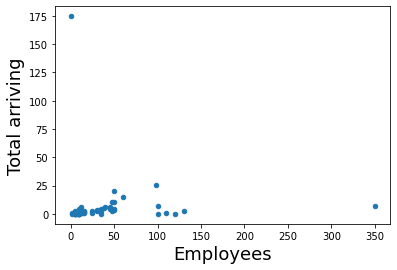

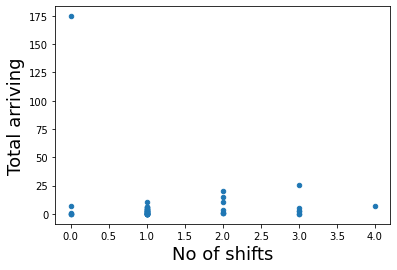

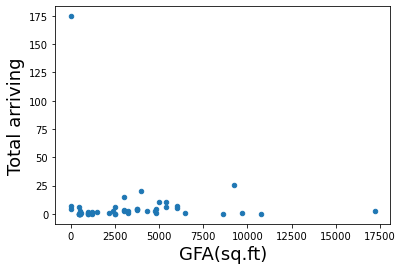

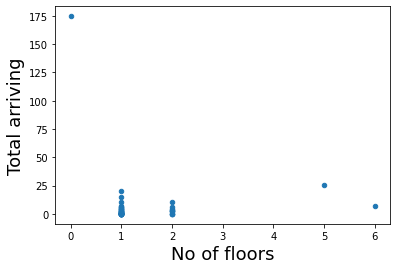

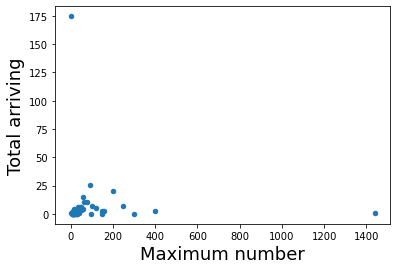

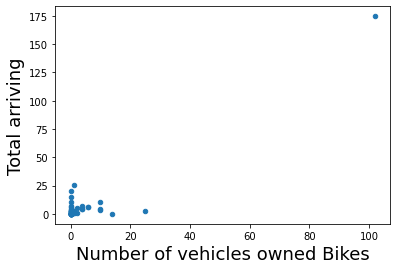

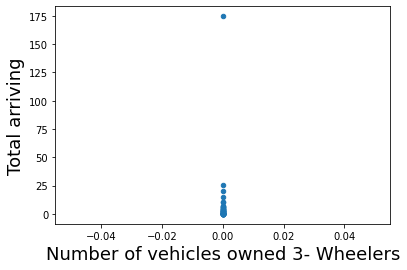

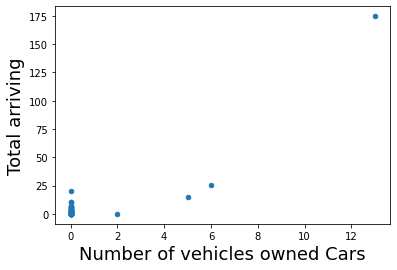

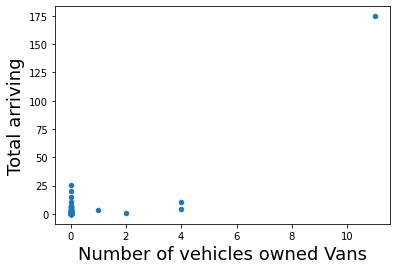

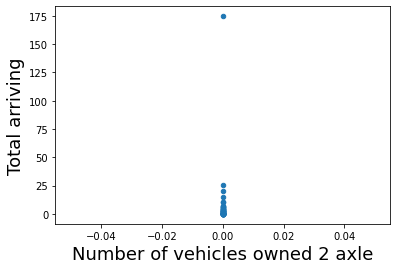

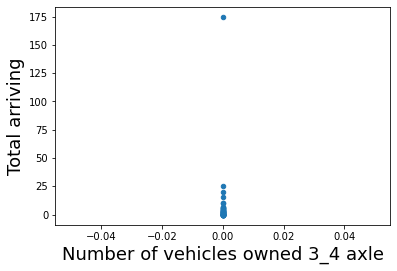

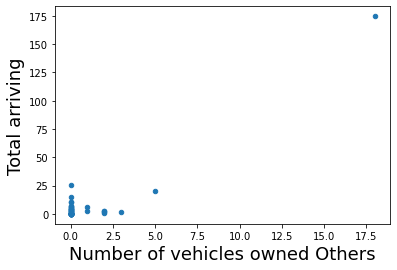

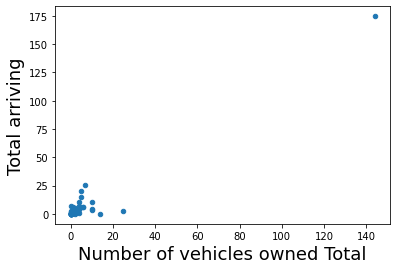

In [12]:
for col in df.columns[2:15].values:
    df.plot.scatter(x=col, y='Total arriving')
    plt.xlabel(col, fontsize=18)
    plt.ylabel('Total arriving', fontsize=18)
    plt.savefig(('plots/'+str(col)+'.png'))
    plt.show()

In [13]:
l=df.columns[2:15].values
l=np.append(l,'Total arriving')

In [14]:
df[l].corr().to_excel('corr.xlsx')

In [15]:
dfn = df

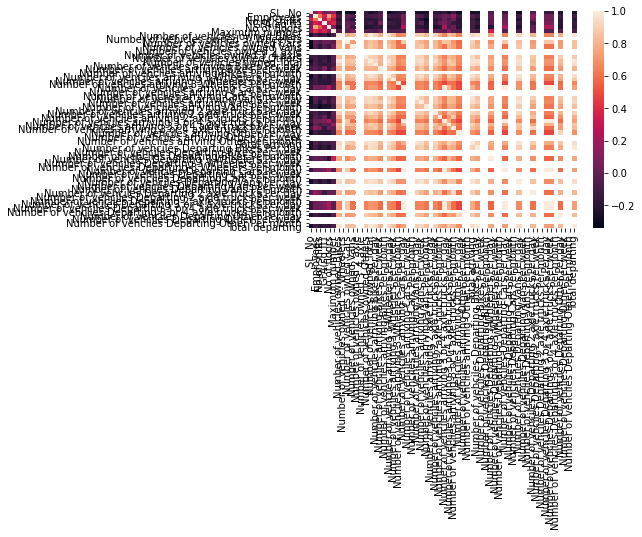

In [16]:
import seaborn as sns

Var_Corr = dfn.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)

In [17]:
df.corr()['Total arriving']

SL. No                                                      -0.258391
Employees                                                   -0.036929
No of shifts                                                -0.135315
GFA(sq.ft)                                                  -0.089777
No of floors                                                -0.112414
Maximum number                                              -0.058719
Number of vehicles owned Bikes                               0.933532
Number of vehicles owned 3- Wheelers                              NaN
Number of vehicles owned Cars                                0.902067
Number of vehicles owned Vans                                0.869243
Number of vehicles owned 2 axle                                   NaN
Number of vehicles owned 3_4 axle                                 NaN
Number of vehicles owned Others                              0.932448
Number of vehicles owned Total                               0.967609
Number of vehciles a

In [18]:
name = ['Jarque-Bera test', 'Chi-squared p-value', 'Skewness', 'Kurtosis']
#run the Jarque-Bera test for Normality on the residuals vector
test = sms.jarque_bera(resid)
#print out the test results. This will also print the Skewness and Kurtosis of the resid vector
lzip(name, test)

[('Jarque-Bera test', 7.9398751293094785),
 ('Chi-squared p-value', 0.018874611541252244),
 ('Skewness', -0.9569864726545169),
 ('Kurtosis', 3.3845095924598136)]

In [22]:
np.mean(resid)

-1.5987211554602255e-15

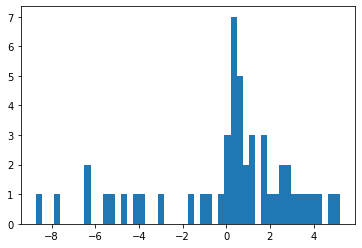

In [19]:
plt.hist(resid, bins=50)
plt.show()